<a href="https://colab.research.google.com/github/Pittella0/HomeWork/blob/main/finalProjectBCS109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#My project data frame is video game sales from 1980s till 2016

My goal throughout this project is to see which console had the most games,  
I will also be looking at game publishers, they are important because this is the golden age when game publishers didn’t oversell and underdeliver.

In [1]:
# load up some pandas and what not
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns


URL = "https://raw.githubusercontent.com/Pittella0/HomeWork/main/VGS_Copy_csv.csv"


# take a look in a book... i mean data

df = pd.read_csv(URL, encoding = 'unicode_escape', engine ='python')


# i noticed the year column is a float and im going to change that later...
copy_df = df.copy()
df.head()

Name Platform  Year_of_Release         Genre  \
0                Wii Sports      Wii           2006.0        Sports   
1         Super Mario Bros.      NES           1985.0      Platform   
2            Mario Kart Wii      Wii           2008.0        Racing   
3         Wii Sports Resort      Wii           2009.0        Sports   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   

  Publisher/Developer  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0            Nintendo     41.36     28.96      3.77         8.45   
1            Nintendo     29.08      3.58      6.81         0.77   
2            Nintendo     15.68     12.76      3.79         3.29   
3            Nintendo     15.61     10.93      3.28         2.95   
4            Nintendo     11.27      8.89     10.22         1.00   

   Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count Developer  \
0         82.53          76.0          51.0         8.0       322.0  Nintendo   
1         40.24           NaN           NaN         NaN         NaN       NaN   
2         35.52          82.0          73.0         8.3       709.0  Nintendo   
3         32.77          80.0          73.0         8.0       192.0  Nintendo   
4         31.37           NaN           NaN         NaN         NaN       NaN   

  Rating   Drop me  
0      E  Nintendo  
1    NaN  Nintendo  
2      E  Nintendo  
3      E  Nintendo  
4    NaN  Nintendo

So when I looked through my data initially I saw some oddities in the release year and publisher columns.  I combined the 2 columns. What ever wasn’t in publishers usually was in developers so I applied a few excel “bandaids” to fill in some of the missing pieces. 


In [2]:
# Now I’m getting an idea of what the shape is. 
df.shape
# wowza thats big

(16719, 17)

I have too many nulls in 7 of my 17 columns. So now I’m dropping the 7 columns as well as getting rid of some any nulls

In [3]:
# checking for nulls
df.isnull().sum()

Name                      2
Platform                  0
Year_of_Release         269
Genre                     2
Publisher/Developer      54
NA_Sales                  0
EU_Sales                  0
JP_Sales                  0
Other_Sales               0
Global_Sales              0
Critic_Score           8582
Critic_Count           8582
User_Score             9129
User_Count             9129
Developer              6623
Rating                 6769
Drop me                  54
dtype: int64

In [4]:
# need to make an 'OH NO' copy
df_copy = df.copy()
# im droppping columns
df=df.drop(['Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating','Drop me'],axis = 1)
df = df.dropna()
df.head(15)

Name Platform  Year_of_Release         Genre  \
0                    Wii Sports      Wii           2006.0        Sports   
1             Super Mario Bros.      NES           1985.0      Platform   
2                Mario Kart Wii      Wii           2008.0        Racing   
3             Wii Sports Resort      Wii           2009.0        Sports   
4      Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                        Tetris       GB           1989.0        Puzzle   
6         New Super Mario Bros.       DS           2006.0      Platform   
7                      Wii Play      Wii           2006.0          Misc   
8     New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                     Duck Hunt      NES           1984.0       Shooter   
10                   Nintendogs       DS           2005.0    Simulation   
11                Mario Kart DS       DS           2005.0        Racing   
12  Pokemon Gold/Pokemon Silver       GB           1999.0  Role-Playing   
13                      Wii Fit      Wii           2007.0        Sports   
14           Kinect Adventures!     X360           2010.0          Misc   

       Publisher/Developer  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0                 Nintendo     41.36     28.96      3.77         8.45   
1                 Nintendo     29.08      3.58      6.81         0.77   
2                 Nintendo     15.68     12.76      3.79         3.29   
3                 Nintendo     15.61     10.93      3.28         2.95   
4                 Nintendo     11.27      8.89     10.22         1.00   
5                 Nintendo     23.20      2.26      4.22         0.58   
6                 Nintendo     11.28      9.14      6.50         2.88   
7                 Nintendo     13.96      9.18      2.93         2.84   
8                 Nintendo     14.44      6.94      4.70         2.24   
9                 Nintendo     26.93      0.63      0.28         0.47   
10                Nintendo      9.05     10.95      1.93         2.74   
11                Nintendo      9.71      7.47      4.13         1.90   
12                Nintendo      9.00      6.18      7.20         0.71   
13                Nintendo      8.92      8.03      3.60         2.15   
14  Microsoft Game Studios     15.00      4.89      0.24         1.69   

    Global_Sales  
0          82.53  
1          40.24  
2          35.52  
3          32.77  
4          31.37  
5          30.26  
6          29.80  
7          28.92  
8          28.32  
9          28.31  
10         24.67  
11         23.21  
12         23.10  
13         22.70  
14         21.81

In [5]:
# whats it lookin like
df.shape

(16416, 10)

In [6]:
# i want to check my dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 16416 non-null  object 
 1   Platform             16416 non-null  object 
 2   Year_of_Release      16416 non-null  float64
 3   Genre                16416 non-null  object 
 4   Publisher/Developer  16416 non-null  object 
 5   NA_Sales             16416 non-null  float64
 6   EU_Sales             16416 non-null  float64
 7   JP_Sales             16416 non-null  float64
 8   Other_Sales          16416 non-null  float64
 9   Global_Sales         16416 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [7]:
df.nunique()

Name                   11397
Platform                  31
Year_of_Release           39
Genre                     12
Publisher/Developer      612
NA_Sales                 401
EU_Sales                 307
JP_Sales                 244
Other_Sales              155
Global_Sales             628
dtype: int64

This little pearl is from stack overflow
break down of this guy is it grabs all the datatypes labeled as object from the
columns of the data frame.
The beauty in this code is I don’t need to look all of my columns, it just grabs the type I want to alter. That’s cool if I had a lot of column names to parse through
Then it fills in any NAs with a string letting me know to drop it
i already dropped any row with an NA but this is cool to have just incase
it also converts the object types to string types
However it dose not work, i could not convert my data objects to strings .

In [13]:

# It was supposed to work but it didn’t convert any objects to strings            
# strCols = df.select_dtypes(include='object').columns
# print(strCols)
# df[strCols] = df[strCols].fillna('drop_me').astype(str)
# print(strCols)

# df = df.astype({'Year_of_Release':'int','Name':'str', 'Platform':'str', 'Genre':'str', 'Publisher/Developer':'str' })
df = df.astype({'Year_of_Release':'int'})
df = df.astype({'Platform':'str'})
# cant change the data type
df.head()

Name Platform  Year_of_Release         Genre  \
0                Wii Sports      Wii             2006        Sports   
2            Mario Kart Wii      Wii             2008        Racing   
3         Wii Sports Resort      Wii             2009        Sports   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                    Tetris       GB             1989        Puzzle   

  Publisher/Developer  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0            Nintendo     41.36     28.96      3.77         8.45         82.53  
2            Nintendo     15.68     12.76      3.79         3.29         35.52  
3            Nintendo     15.61     10.93      3.28         2.95         32.77  
4            Nintendo     11.27      8.89     10.22         1.00         31.37  
5            Nintendo     23.20      2.26      4.22         0.58         30.26

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13741 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 13741 non-null  object 
 1   Platform             13741 non-null  object 
 2   Year_of_Release      13741 non-null  int64  
 3   Genre                13741 non-null  object 
 4   Publisher/Developer  13741 non-null  object 
 5   NA_Sales             13741 non-null  float64
 6   EU_Sales             13741 non-null  float64
 7   JP_Sales             13741 non-null  float64
 8   Other_Sales          13741 non-null  float64
 9   Global_Sales         13741 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


In [15]:
df.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     13741.000000  13741.000000  13741.000000  13741.000000   
mean       2007.567062      0.270654      0.145821      0.065578   
std           4.952963      0.787781      0.528741      0.287844   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2005.000000      0.010000      0.000000      0.000000   
50%        2008.000000      0.090000      0.020000      0.000000   
75%        2011.000000      0.250000      0.110000      0.030000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  
count  13741.000000  13741.000000  
mean       0.051767      0.534073  
std        0.203124      1.579477  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.530000

Come hell or hight water I am determined to rid my self of these consoles I don’t care about.
<br>
**I’m removing all the older gaming devices.**
<br>
Gen = Saga Genesis 
<br>
SNES == Super Nintendo Entertainment System
<br>
NES ==  Nintendo Entertainment System
<br>
PC == Personal computer
<br>
PS == Playstation
<br>
I don’t know what SAT, 3DO, TG16, NG or SCD, but I can assume based on when they came out that they were arcade games or misspelled

In [10]:
# sorry not sorry consouls > Pc
dropping = [0,2600, "Gen","SNES", "NES","PC","PS","SAT","NG","SCD","3DO","TG16"]
df = df[~df['Platform'].isin(dropping)]
#wow thats a big jump from 16,000 to just under 14,000
df.shape

(13741, 10)

## Graphing value counts of Publisher/Developer column

The data set is huge, so I’m  just looking at the first 100 values to get an idea of why so many unique values. There are a lot of familiar names here, like Electronic Arts, Ubisoft, and Microsoft Game Studios. As well as names I haven’t heard of. As it turns out most if not all these smaller companies where bought out by the bigger studios. 

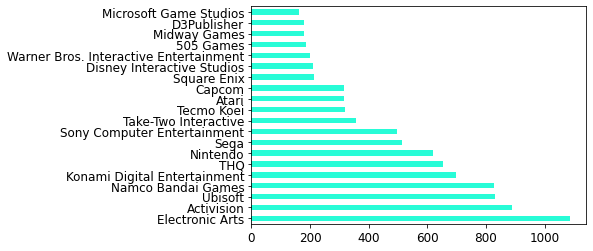

In [12]:

df['Publisher/Developer'].value_counts()[:20].plot(kind='barh',color="#28FCD7", fontsize = 12)

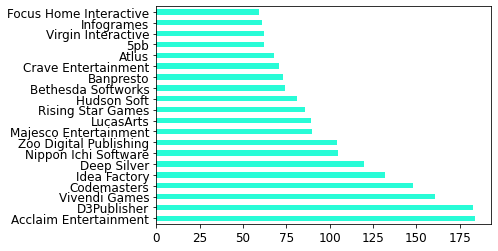

In [ ]:
df['Publisher/Developer'].value_counts()[20:40].plot(kind='barh',color="#28FCD7", fontsize = 12)

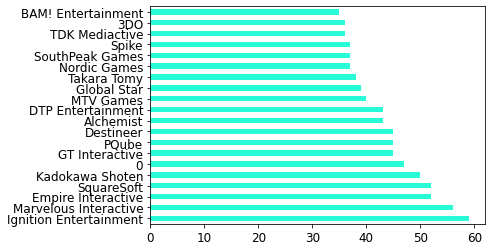

In [ ]:
df['Publisher/Developer'].value_counts()[40:60].plot(kind='barh',color="#28FCD7", fontsize = 12)

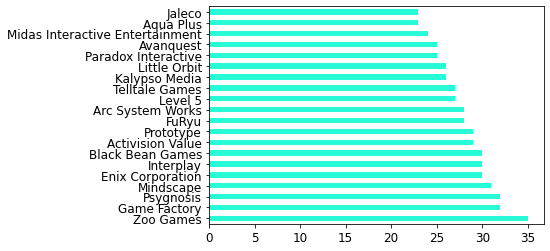

In [ ]:
df['Publisher/Developer'].value_counts()[60:80].plot(kind='barh',color="#28FCD7", fontsize = 12)

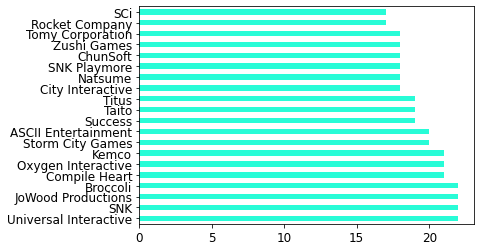

In [ ]:
df['Publisher/Developer'].value_counts()[80:100].plot(kind='barh',color="#28FCD7", fontsize = 12)

## Making sense of the numerical data

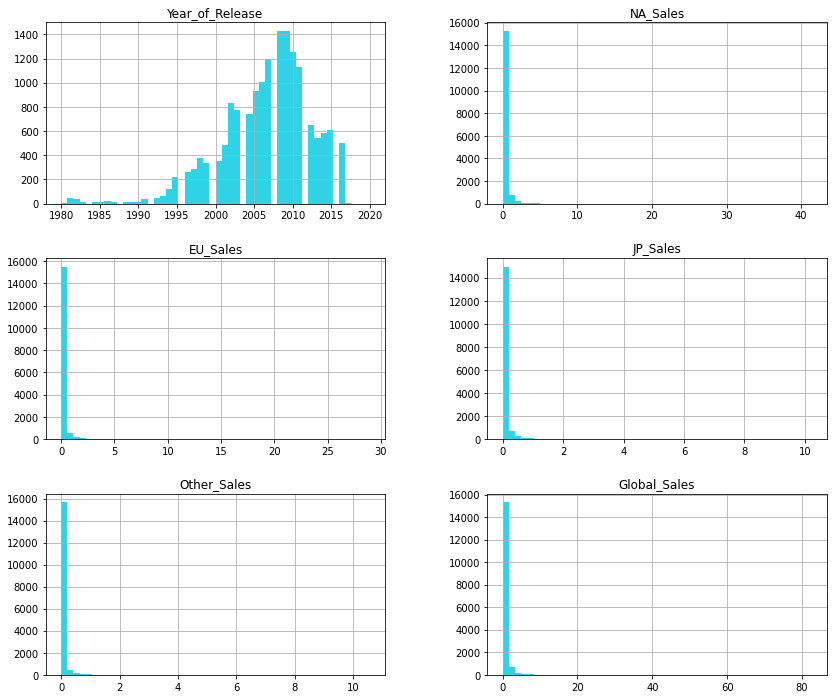

In [ ]:
df_numerical = df.drop(['Platform','Genre','Publisher/Developer'],axis = 1)
df_numerical.hist(bins=50,color='#30D3E6', figsize=(14,12))
plt.show()

The stater matrixes allows me to see as the years progress more sales are made domestically as well as globally.
I also can see that there are way more North America sales compared to Japan with Europe in the middle.
That kinda stands out to me because you would think with the Nintendo, Sony, and Namco Bandai Games based in Japan that they would sell more locally than oversees. I don’t think my data covers any of the “region release exclusives”, there are many games Japan releases only in the country of Japan, that can only be bought there. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4144bb4250>,
      dtype=object)

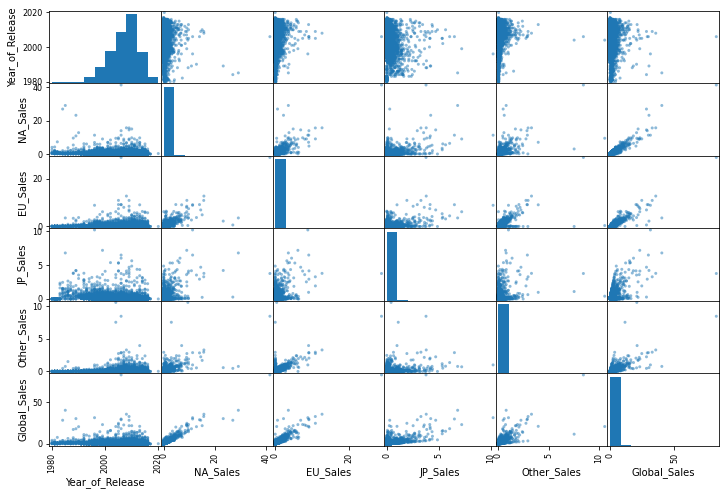

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['Year_of_Release','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
scatter_matrix(df[attributes], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4144be4d50>,
      dtype=object)

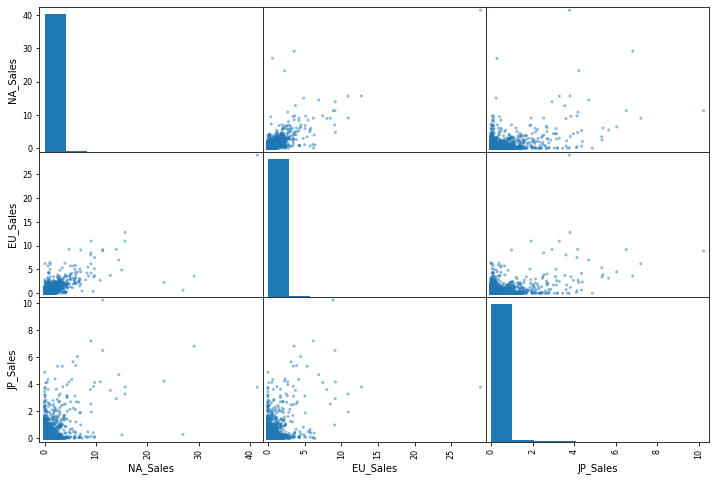

In [ ]:
attributes = ['NA_Sales', 'EU_Sales', 'JP_Sales']
scatter_matrix(df[attributes], figsize=(12, 8))

In [14]:
#pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     / 21.8 MB 153 kB/s
     |████████████████████████████████| 10.9 MB 14.0 MB/s 
     |████████████████████████████████| 596 kB 41.2 MB/s 
     |████████████████████████████████| 102 kB 37.2 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=1156945b15a45c79e5203fa0d70d292dd9b4ebe2d43c11834080000ad9a98111
  Stored in directory: /tmp/pip-ephem-wheel-cache-api1te00/wheels/c3/aa/10/94ee985ca5a122f047c430cf991df62fe210c4789d3b5762a5
Successfully built pandas-profiling
  Attempting uninstall: visions
    Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstall

I was surprised after using pandas profiling is that Action games where the clear winner in most popular with a 1001 lead over sports.
Another surprise is that miscellaneous games(Puzzles, and what not) where more popular than shooters.

<br>
We can see that all of the sales data is correlated with each other.
<br> 
We can see that approximately 30% of the game names are repeats. This is okay because a game can be released on multiple consuls

<br>
***The Publisher with the most amount of games produced is EA (Electronic Arts).The console with the most games to its name is the PS2.***


In [11]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]